In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()


In [2]:
from sklearn.svm import SVC


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X = iris.data[:,(2,3)]  #petal lenght and petal width 2nd and 3rd column
y = iris.target

In [10]:
X,y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [11]:
setosa_or_versicolor = (y == 0) | (y == 1)    
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [12]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


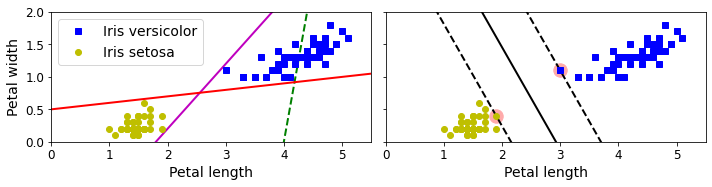

In [16]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
#bad model line representation 
pred_1 = 5*x0 - 20                         #green  -- line
pred_2 = x0 - 1.8                          #purple solid line
pred_3 = 0.1 * x0 + 0.5                    #red solid line



def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]                                 #you can just print w and b
    b = svm_clf.intercept_[0] 
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_                             #actually acording to theory support vector is the instances that
                                                               #re located at the edge of the streets
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

    

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

In [17]:
x0

array([0.        , 0.02763819, 0.05527638, 0.08291457, 0.11055276,
       0.13819095, 0.16582915, 0.19346734, 0.22110553, 0.24874372,
       0.27638191, 0.3040201 , 0.33165829, 0.35929648, 0.38693467,
       0.41457286, 0.44221106, 0.46984925, 0.49748744, 0.52512563,
       0.55276382, 0.58040201, 0.6080402 , 0.63567839, 0.66331658,
       0.69095477, 0.71859296, 0.74623116, 0.77386935, 0.80150754,
       0.82914573, 0.85678392, 0.88442211, 0.9120603 , 0.93969849,
       0.96733668, 0.99497487, 1.02261307, 1.05025126, 1.07788945,
       1.10552764, 1.13316583, 1.16080402, 1.18844221, 1.2160804 ,
       1.24371859, 1.27135678, 1.29899497, 1.32663317, 1.35427136,
       1.38190955, 1.40954774, 1.43718593, 1.46482412, 1.49246231,
       1.5201005 , 1.54773869, 1.57537688, 1.60301508, 1.63065327,
       1.65829146, 1.68592965, 1.71356784, 1.74120603, 1.76884422,
       1.79648241, 1.8241206 , 1.85175879, 1.87939698, 1.90703518,
       1.93467337, 1.96231156, 1.98994975, 2.01758794, 2.04522

### Sensitivity  of Feature Scale

Saving figure sensitivity_to_feature_scales_plot


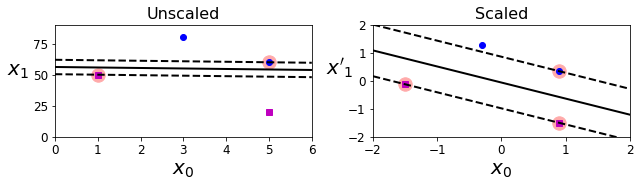

In [19]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)              #using pre defined plot_svc_desision_boundary which is defined above 
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler       #here we do scaling thing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

## Large margin vs margin violations